# Welcome to Celebrity Finder Notebook

## Importing Library

In [9]:
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request, urlretrieve
from IPython.display import IFrame, display
from PIL import Image
from selenium import webdriver
import os

## Spelling Checker

In [11]:
def spelling_checker(x):
    crt_inp=''
    search = '+'.join(x.split())
    url='https://www.google.com/search?q='+ search
    driver = webdriver.Chrome(executable_path=r'C:\Users\jpravijo\Desktop\Anaconda\chromedriver_win32 (3)\chromedriver.exe')
    driver.get(url)
    html = driver.page_source
    soup = BeautifulSoup(html,'lxml')
    driver.close()
    try:
        first = soup.find('div', id='taw')
        crt_inp=first.find('a', class_='gL9Hy').text
    except:
        crt_inp=x
    return crt_inp
print('enter the celebrity name to spell check')
spell_inp = input()
inp = spelling_checker(spell_inp)
if spell_inp == inp:
    print('\033[1m' + 'U have entered a proper spelling of a celebrity and we can continue with this')
else:
    print('\n' + 'The celebrity name close to your spelling is ' + '\033[1m' + inp + '\033[0m' + ' and we can continue with this')

enter the celebrity name to spell check
keven de bynre

The celebrity name close to your spelling is kevin de bruyne and we can continue with this


## Celebrity Detail Finder Function

In [12]:
def process_inp(x):
    temp=''
    for i in x.split():
        temp = temp + ' '+ i.capitalize()
    name = temp.lstrip()
    temp = '_'.join(name.split())
    return temp, name
inp, name = process_inp(inp)

In [13]:
def celebrity_func(inp, name):
    url='https://en.wikipedia.org/wiki/'+inp
    html=urlopen(url)
    soup=BeautifulSoup(html,'lxml')
    first = soup.find('div', id='mw-content-text')
    try:
        Description = first.find('div', class_='shortdescription nomobile noexcerpt noprint searchaux').text
    except:
        Description = 'Not Found'
    try:
        DOB = first.find('span', class_='bday').text
    except:
        DOB = 'Not Found'
    try:
        image_link = "https:" + first.find('a', class_='image').img['src']
    except:
        image_link = 'Not Found'
    
    #Birth_Place = first.find('span', class_='birthplace').text
    #Birth_Place = first.find('td', class_='birthplace').text
    #Birth_Place = first.find('div', class_='birthplace').text
    for y in ['div', 'span', 'td']: 
        try:
            Birth_Place = first.find(y, class_='birthplace').text
            Birth_Place = ' '.join(Birth_Place.split('\n'))
            Birth_Place = ' '.join(Birth_Place.split(' '))
            Birth_Place = ''.join(Birth_Place.split('[')[0])
            break
        except:
            Birth_Place = ''
    dic={'Name': name, 'Description': Description, 'DOB': DOB, 'Birth_Place':Birth_Place, 'Image_Link':image_link, 'URL':url}
    return dic
try:
    dic = celebrity_func(inp, name)
    df = pd.DataFrame(dic, index=['Index'])
    df.drop(['Image_Link'], axis=1, inplace=True)
except:
    print('This is not a celebrity\'s name ')

Please confirm the celebrity with 'yes' or 'no' by running the next cell


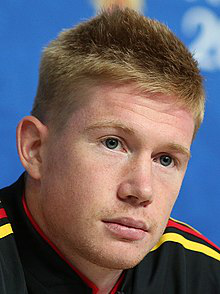

In [14]:
#To Download the picture from the link and save in the filepath
filepath = r"C:\Users\jpravijo\Desktop\Anaconda\Celebrities_Images\\" + inp +".png"
urlretrieve(dic['Image_Link'], filepath)

#To Display the downloaded picture
image = Image.open(filepath)
print('\033[1m' + 'Please confirm the celebrity with \'yes\' or \'no\' by running the next cell'.center(50))
image

## Confirm the celebrity for details

In [15]:
Confirmation = input('\033[1m' + 'Please confirm the celebrity with \'yes\' or \'no\' - '.center(50))
found = 100000
if Confirmation == 'yes':
    found = df.index[df['Name']==name]
    display(df.loc[found, :])
    print('\n'+'\033[1m' + 'For more details run additional details cell')
else:
    print('\n'+'\033[1m' + 'Sry!! Please check the spelling of the celebrity and try again')

Please confirm the celebrity with 'yes' or 'no' -  yes


,Name,Description,DOB,Birth_Place,URL
Index,Kevin De Bruyne,Belgian footballer,1991-06-28,"Drongen, Belgium",https://en.wikipedia.org/wiki/Kevin_De_Bruyne



For more details run additional details cell


## Additional Details

In [ ]:
IFrame('https://en.wikipedia.org/wiki/'+ inp, width=950, height=800)